**Pergunta :** O nivel de escolaridade afeta a chance de uma pessoa perder o emprego?

In [1]:
%matplotlib inline
import pandas as pd

import numpy as np
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
desemprego_por_escolaridade = pd.read_csv("oecd.csv")
desemprego_por_escolaridade.drop(['INDICATOR','MEASURE','FREQUENCY','Flag Codes'], axis=1, inplace=True)
data1=desemprego_por_escolaridade

In [3]:
#escolaridade_index =desemprego_por_escolaridade.set_index('LOCATION')
#desemprego_por_escolaridade.pivot(index ='LOCATION', columns ='SUBJECT')

In [4]:
desemprego= pd.read_csv("desemprego.csv")
desemprego.drop(['Country Name','Series Name','Series Code'], axis=1, inplace=True)
desemprego.head(3)

,Country Code,1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,KOR,2.608,6.963,6.342,4.400,4.000,3.300,3.600,3.700,3.700,3.400,3.200,3.100,3.500,3.600,3.700,3.700,3.848
1,USA,5.000,4.510,4.219,3.992,4.731,5.783,5.989,5.529,9.633,8.949,8.069,7.375,6.168,5.280,4.869,4.355,3.896
2,DEU,9.863,9.788,8.855,7.917,7.773,8.482,9.779,10.727,6.966,5.824,5.379,5.231,4.981,4.624,4.122,3.746,3.384


In [5]:
#Cruza as duas tabelas via país
#escolaridade_index =desemprego_por_escolaridade.set_index('LOCATION')
#desempregoT_index = desemprego.set_index('Country Code')
#df = escolaridade_index.join(desempregoT_index, how='inner')
#df.head()


In [12]:
#data1.rename(columns={'SUBJECT':'Escolaridade'},index={'DEU':'Alem','KOR':'Coreia','USA':'EUA'}, inplace=True)
data1["Escolaridade"]= data1["Escolaridade"].str.replace("BUPPSRY", "Prim_sem_Secun", case = False)
data1["Escolaridade"]=data1["Escolaridade"].str.replace("UPPSRY_NTRY", "Com_Secun_sem_superior", case = False) 
data1["Escolaridade"]=data1["Escolaridade"].str.replace("TRY", "Com_ens_superior", case = False) 
data1.head()

,LOCATION,Escolaridade,TIME,Value
0,DEU,Prim_sem_Secun,1997,16.671282
1,DEU,Prim_sem_Secun,1998,16.517719
2,DEU,Prim_sem_Secun,1999,15.599174
3,DEU,Prim_sem_Secun,2000,13.665389
4,DEU,Prim_sem_Secun,2001,13.515862


In [43]:
Alemanha = data1.loc[(desemprego_por_escolaridade['LOCATION'])=='DEU']
Eua=data1.loc[(desemprego_por_escolaridade['LOCATION'])=='USA']
Coreia=data1.loc[(desemprego_por_escolaridade['LOCATION'])=='KOR']

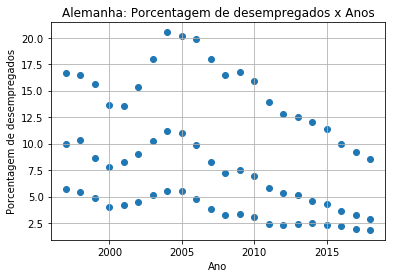

In [8]:
Alemanha = data1.loc[(desemprego_por_escolaridade['LOCATION'])=='DEU']

plt.scatter(Alemanha['TIME'],Alemanha['Value'])
plt.xlabel('Ano')
plt.ylabel('Porcentagem de desempregados')
plt.title('Alemanha: Porcentagem de desempregados x Anos')
plt.grid(True)
plt.show()


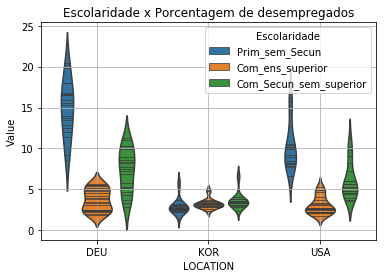

In [42]:
sns.violinplot(
    data=data1,
    x='LOCATION',
    y='Value',
    hue='Escolaridade',
    kind='box',
    inner="stick",
    height=30, 
    aspect=50) 
plt.title('Escolaridade x Porcentagem de desempregados')
plt.grid(True)
plt.show()

In [ ]:
sns.